This is to create the final visualizations for the report.

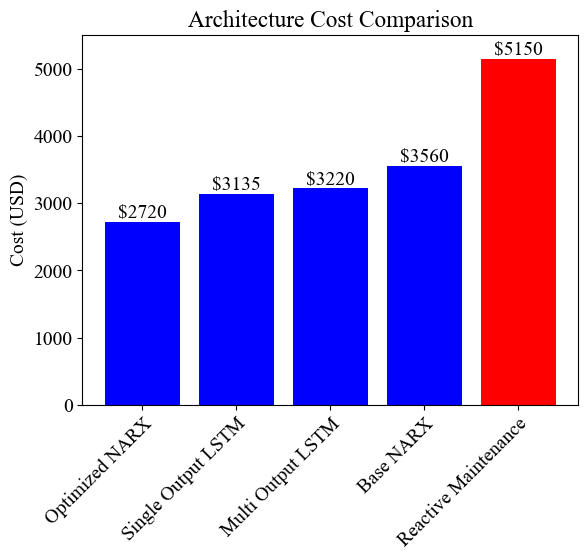

In [6]:
import matplotlib.pyplot as plt

# Sample dictionary with dollar values and labels
data = {
    'Base NARX': 3560,
    'Optimized NARX': 2720,
    'Single Output LSTM': 3135,
    'Multi Output LSTM': 3220,
    'Reactive Maintenance': 5150
}

plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=14) 


# Sort the dictionary by values in ascending order
sorted_data = sorted(data.items(), key=lambda x: x[1])

# Extract labels and values after sorting
labels, values = zip(*sorted_data)

# Create the bar graph
plt.bar(range(len(labels) - 1), values[:-1], color='blue')  # Bars except the last one are blue
plt.bar(len(labels) - 1, values[-1], color='red')  # The last bar is red

# Add labels to the bars
for i, v in enumerate(values):
    plt.text(i, v, f"${v}", ha='center', va='bottom')

# Set the x-axis labels with tilted text
plt.xticks(range(len(labels)), labels, rotation=45, ha='right', rotation_mode="anchor")  # Rotate the labels by 45 degrees

plt.ylim(0, 5500)  # Set y-axis limits from 0 to 20

# Label the axes and title
# plt.xlabel('Labels')
plt.ylabel('Cost (USD)')
plt.title('Architecture Cost Comparison')

# Show the plot
plt.show()

In [4]:
import pandas as pd

df = pd.read_csv('data (processed)/base_case_data.csv', index_col=0)
df = df[df['machineID'] == 1]
df['datetime'] = pd.to_datetime(df['datetime'])

errors = df[df['failure']!='0'].reset_index(drop=True)

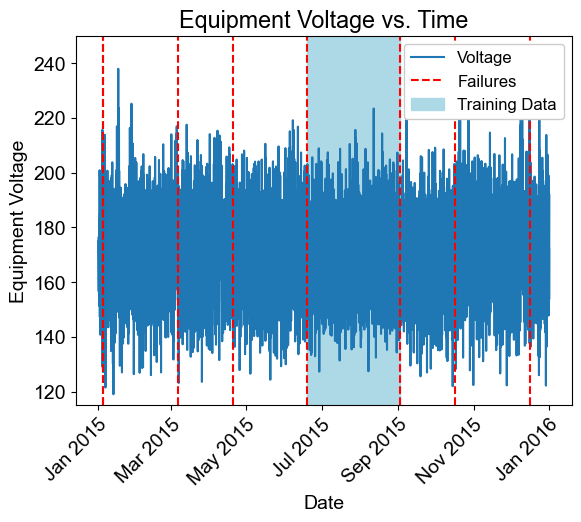

In [12]:
from datetime import datetime
import matplotlib.dates as mdates

plt.rcParams["font.family"] = "Arial"
plt.rc('font', size=14) 

# Create a plot
plt.plot(df['datetime'], df['volt'], label='Voltage')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Equipment Voltage')
plt.title('Equipment Voltage vs. Time')

plt.axvline(x=errors['datetime'][0], color='r', linestyle='--', label='Failure')

# Shade the region under the line plot
plt.fill_between([datetime(2015, 6, 19), datetime(2015, 9, 2)], [250, 250], color='lightblue', alpha=1, label='Shaded Area')

# Add legend
legend = plt.legend(['Voltage', 'Failures', 'Training Data'], loc='upper right', fontsize='12', framealpha=1)

for value in errors['datetime']:
    plt.axvline(x=value, color='r', linestyle='--', label='Failure')

plt.ylim(115, 250)  # Set y-axis limits from 0 to 20

# Set the x-axis labels with tilted text
plt.xticks(rotation=45, ha='right', rotation_mode="anchor")  # Rotate the labels by 45 degrees

# Create a date formatter for the x-axis
date_format = mdates.DateFormatter('%b %Y')  # '%b' represents abbreviated month, '%Y' represents year
plt.gca().xaxis.set_major_formatter(date_format)

# Show the plot
plt.show()